Variance of transformed features:
 trestbps    0.016894
chol        0.041401
thalach     0.027054
dtype: float64

Logistic Regression:
Training Accuracy: 86.32075471698113 %
Testing Accuracy: 81.31868131868131 %
Confusion Matrix:
 [[32 12]
 [ 5 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91


Random Forest Classifier:
Training Accuracy: 100.0 %
Testing Accuracy: 84.61538461538461 %
Confusion Matrix:
 [[33 11]
 [ 3 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.82        44
           1       0.80      0.94      0.86        47

    accuracy                           0.85        91
   macro avg       0.86    

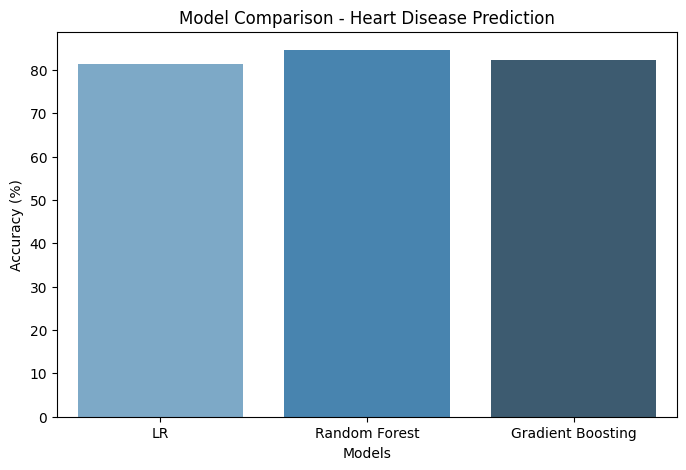

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pickle  # Import pickle to save models

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('heart.csv')

# Apply log transformation to selected features
df['trestbps'] = np.log(df['trestbps'])
df['chol'] = np.log(df['chol'])
df['thalach'] = np.log(df['thalach'])

# Check variance of transformed features (optional)
print("Variance of transformed features:\n", np.var(df[["trestbps", 'chol', 'thalach']]))

# Separate features and target
X = df.drop('target', axis=1)    
Y = df['target']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Dictionary to store accuracies
accuracies = {}

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2')
lr.fit(X_train, Y_train)

# Save Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

# Prediction and Accuracy for Logistic Regression
Y_pred = lr.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
accuracies['LR'] = acc * 100
print("\nLogistic Regression:")
print("Training Accuracy:", accuracy_score(Y_train, lr.predict(X_train)) * 100, "%")
print("Testing Accuracy:", accuracy_score(Y_test, Y_pred) * 100, "%")
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Save Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Prediction and Accuracy for Random Forest
Y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(Y_test, Y_pred_rf)
accuracies['Random Forest'] = acc_rf * 100
print("\nRandom Forest Classifier:")
print("Training Accuracy:", accuracy_score(Y_train, rf.predict(X_train)) * 100, "%")
print("Testing Accuracy:", accuracy_score(Y_test, Y_pred_rf) * 100, "%")
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_rf))
print("Classification Report:\n", classification_report(Y_test, Y_pred_rf))

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, Y_train)

# Save Gradient Boosting model
with open('HeartPredictor.pkl', 'wb') as f:
    pickle.dump(gb, f)

# Prediction and Accuracy for Gradient Boosting
Y_pred_gb = gb.predict(X_test)
acc_gb = accuracy_score(Y_test, Y_pred_gb)
accuracies['Gradient Boosting'] = acc_gb * 100
print("\nGradient Boosting Classifier:")
print("Training Accuracy:", accuracy_score(Y_train, gb.predict(X_train)) * 100, "%")
print("Testing Accuracy:", accuracy_score(Y_test, Y_pred_gb) * 100, "%")
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_gb))
print("Classification Report:\n", classification_report(Y_test, Y_pred_gb))

# Display accuracies of all models
print("\nModel Accuracies:")
for model, acc in accuracies.items():
    print(f"{model}: {acc:.2f}%")

# Plotting the comparison of model accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="Blues_d")
plt.title("Model Comparison - Heart Disease Prediction")
plt.ylabel('Accuracy (%)')
plt.xlabel('Models')
plt.show()

